In [180]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from pathlib import Path

In [181]:
df = pd.read_csv("https://raw.githubusercontent.com/byoung6/covid/lings_branch/clean_selected_covid_data2.csv")
df.head(5)

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
0,2021-01-30,Algeria,Africa,250.429,33.0,0.740,3.857,30.0
1,2021-02-01,Algeria,Africa,246.286,29.0,0.650,4.000,2509.0
2,2021-02-02,Algeria,Africa,249.143,23.0,0.516,3.857,2819.0
3,2021-02-05,Algeria,Africa,248.857,21.0,0.471,3.571,3217.0
4,2021-02-08,Algeria,Africa,247.857,25.0,0.560,3.429,3748.0


In [182]:
# looking at info on our selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13856 entries, 0 to 13855
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       13856 non-null  object 
 1   location                   13856 non-null  object 
 2   continent                  13856 non-null  object 
 3   new_cases_smoothed         13856 non-null  float64
 4   icu_patients               13856 non-null  float64
 5   icu_patients_per_million   13856 non-null  float64
 6   new_deaths_smoothed        13856 non-null  float64
 7   new_vaccinations_smoothed  13856 non-null  float64
dtypes: float64(5), object(3)
memory usage: 866.1+ KB


In [183]:
# checking for nulls
df.isnull().sum()

date                         0
location                     0
continent                    0
new_cases_smoothed           0
icu_patients                 0
icu_patients_per_million     0
new_deaths_smoothed          0
new_vaccinations_smoothed    0
dtype: int64

In [184]:
# dropping nulls
clean_selection = df.dropna()

In [185]:
# double checking there are no nulls after drop
clean_selection.isnull().sum()

date                         0
location                     0
continent                    0
new_cases_smoothed           0
icu_patients                 0
icu_patients_per_million     0
new_deaths_smoothed          0
new_vaccinations_smoothed    0
dtype: int64

In [186]:
#  1. Get the total vaccination rate for north america
usa_vaccination = df.groupby('location')
usa_vaccination

In [187]:
for location, location_df in usa_vaccination:
    print(location)
    print(location_df)

Algeria
           date location continent  new_cases_smoothed  icu_patients  \
0    2021-01-30  Algeria    Africa             250.429          33.0   
1    2021-02-01  Algeria    Africa             246.286          29.0   
2    2021-02-02  Algeria    Africa             249.143          23.0   
3    2021-02-05  Algeria    Africa             248.857          21.0   
4    2021-02-08  Algeria    Africa             247.857          25.0   
..          ...      ...       ...                 ...           ...   
339  2022-02-04  Algeria    Africa            1319.714          40.0   
340  2022-02-05  Algeria    Africa            1184.000          34.0   
341  2022-02-06  Algeria    Africa            1028.857          27.0   
342  2022-02-07  Algeria    Africa             908.714          34.0   
343  2022-02-08  Algeria    Africa             795.429          21.0   

     icu_patients_per_million  new_deaths_smoothed  new_vaccinations_smoothed  
0                       0.740                3.

In [188]:
usa_vaccination.get_group('United States')

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,2020-12-14,United States,North America,220854.571,25560.0,76.776,2567.429,4512.0
13428,2020-12-15,United States,North America,220666.571,25812.0,77.533,2625.143,26940.0
13429,2020-12-16,United States,North America,222976.714,25974.0,78.020,2704.000,71082.0
13430,2020-12-17,United States,North America,223667.571,25894.0,77.780,2770.286,121259.0
13431,2020-12-18,United States,North America,225101.429,25950.0,77.948,2707.571,179953.0
...,...,...,...,...,...,...,...,...
13851,2022-02-11,United States,North America,187509.143,16123.0,48.430,2338.286,429531.0
13852,2022-02-12,United States,North America,180461.429,15408.0,46.282,2324.286,414989.0
13853,2022-02-13,United States,North America,177070.714,14878.0,44.690,2331.000,405192.0
13854,2022-02-14,United States,North America,152034.429,14414.0,43.296,2309.857,369744.0


In [189]:
location_df.head(10)

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,2020-12-14,United States,North America,220854.571,25560.0,76.776,2567.429,4512.0
13428,2020-12-15,United States,North America,220666.571,25812.0,77.533,2625.143,26940.0
13429,2020-12-16,United States,North America,222976.714,25974.0,78.020,2704.000,71082.0
13430,2020-12-17,United States,North America,223667.571,25894.0,77.780,2770.286,121259.0
13431,2020-12-18,United States,North America,225101.429,25950.0,77.948,2707.571,179953.0
13432,2020-12-19,United States,North America,221721.714,25805.0,77.512,2739.143,180233.0
13433,2020-12-20,United States,North America,221947.286,26057.0,78.269,2754.857,169468.0
13434,2020-12-21,United States,North America,220358.429,26431.0,79.393,2776.000,223236.0
13435,2020-12-22,United States,North America,217537.714,26730.0,80.291,2820.429,280043.0
13436,2020-12-23,United States,North America,215497.857,26928.0,80.885,2769.857,339225.0


(429,)


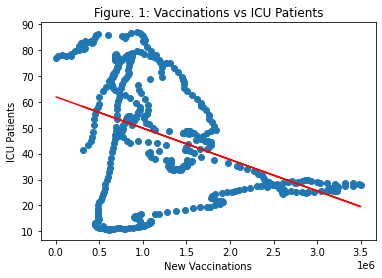

In [190]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.icu_patients_per_million
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('ICU Patients')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

(429,)


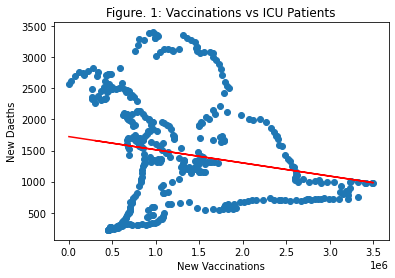

In [191]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.new_deaths_smoothed
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('New Daeths')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

In [221]:
X_1 = location_df.drop(['date','location','continent'],axis='columns')
X_1


,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,220854.571,25560.0,76,2567.429,4512.0
13428,220666.571,25812.0,77,2625.143,26940.0
13429,222976.714,25974.0,78,2704.000,71082.0
13430,223667.571,25894.0,77,2770.286,121259.0
13431,225101.429,25950.0,77,2707.571,179953.0
...,...,...,...,...,...
13851,187509.143,16123.0,48,2338.286,429531.0
13852,180461.429,15408.0,46,2324.286,414989.0
13853,177070.714,14878.0,44,2331.000,405192.0
13854,152034.429,14414.0,43,2309.857,369744.0


In [222]:
X = pd.get_dummies(X_1, columns=["new_vaccinations_smoothed"])
X

,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed_4512.0,new_vaccinations_smoothed_26940.0,new_vaccinations_smoothed_71082.0,new_vaccinations_smoothed_121259.0,new_vaccinations_smoothed_169468.0,new_vaccinations_smoothed_179953.0,...,new_vaccinations_smoothed_3211266.0,new_vaccinations_smoothed_3230427.0,new_vaccinations_smoothed_3231638.0,new_vaccinations_smoothed_3237565.0,new_vaccinations_smoothed_3318805.0,new_vaccinations_smoothed_3324816.0,new_vaccinations_smoothed_3407833.0,new_vaccinations_smoothed_3414078.0,new_vaccinations_smoothed_3485734.0,new_vaccinations_smoothed_3498649.0
13427,220854.571,25560.0,76,2567.429,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13428,220666.571,25812.0,77,2625.143,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13429,222976.714,25974.0,78,2704.000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13430,223667.571,25894.0,77,2770.286,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13431,225101.429,25950.0,77,2707.571,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,187509.143,16123.0,48,2338.286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13852,180461.429,15408.0,46,2324.286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13853,177070.714,14878.0,44,2331.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13854,152034.429,14414.0,43,2309.857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
# convert "Discount" from Float to int
location_df = location_df.astype({'icu_patients_per_million':'int'})

In [224]:
location_df.head()

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,2020-12-14,United States,North America,220854.571,25560.0,76,2567.429,4512.0
13428,2020-12-15,United States,North America,220666.571,25812.0,77,2625.143,26940.0
13429,2020-12-16,United States,North America,222976.714,25974.0,78,2704.000,71082.0
13430,2020-12-17,United States,North America,223667.571,25894.0,77,2770.286,121259.0
13431,2020-12-18,United States,North America,225101.429,25950.0,77,2707.571,179953.0


In [225]:
# assign target variable to y
y = location_df.icu_patients_per_million

In [226]:
X.shape

(429, 433)

In [227]:
y.shape

(429,)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(343, 433)

In [229]:
len(X_train)

343

In [230]:
len(X_test)

86

In [231]:
len(y_test)

86

In [232]:
#Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

In [233]:
model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [234]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)

In [235]:
balanced_accuracy_score(y_test, y_pred)

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.3673913043478261

In [236]:
#Resample with SVM
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [237]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [238]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,52,52
1,27,27
2,36,35
3,34,34
4,75,74


In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5348837209302325

In [241]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       1.00      1.00      1.00         3
          26       1.00      0.50      0.67         4
          27       0.33      1.00      0.50         1
          28       0.67      1.00      0.80         2
          29       1.00      0.67      0.80         3
          31       1.00      1.00      1.00         1
          34       0.67      1.00      0.80         2
          35       1.00      0.33      0.50         3
          36       0.25    

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mal

In [243]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [244]:
model.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [245]:
y_pred = model.predict(X_test)

In [246]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.05434782608695652

In [247]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [248]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         4
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          34       0.06      1.00      0.11         2
          35       0.00      0.00      0.00         3
          36       0.00      0.00      0.00         1
          38       0.00    

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mal